# Train a MLR model on the event stream as output of the DVS
## Makes a training set

In [33]:
%load_ext autoreload
%autoreload 2

from aprovhots import fit_MLR, predict_data
from dataset_creation import Synthetic_Dataset
from HOTS.tools import score_classif_events, score_classif_time, get_dataset_info, get_loader
from HOTS.network import network
import tonic #, os

path = '/home/INT/grimaldi.a/Documents/projets/WP3/2021-12-06_simulator_data/'
patch_size = (32,32)
max_duration = 1e3
date = '2022-01-03'
# we set tau_cla emprirically based on the ISI for SEA samples (see Make_dataset notebook)
tau_from_isi = 200#15/5
tau_cla = tau_from_isi*patch_size[0]*patch_size[1]*2
tau_cla = 3

trainset = Synthetic_Dataset(save_to=path, train=True, patch_size=patch_size, max_duration=max_duration)
testset = Synthetic_Dataset(save_to=path, train=False, patch_size=patch_size, max_duration=max_duration)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


number of samples in the trainset: 8528
number of samples in the testset: 4663
----------------------------------------
number of samples in each class for the trainset: [4788. 3740.]
number of samples in each class for the testset: [3444. 1219.]
----------------------------------------


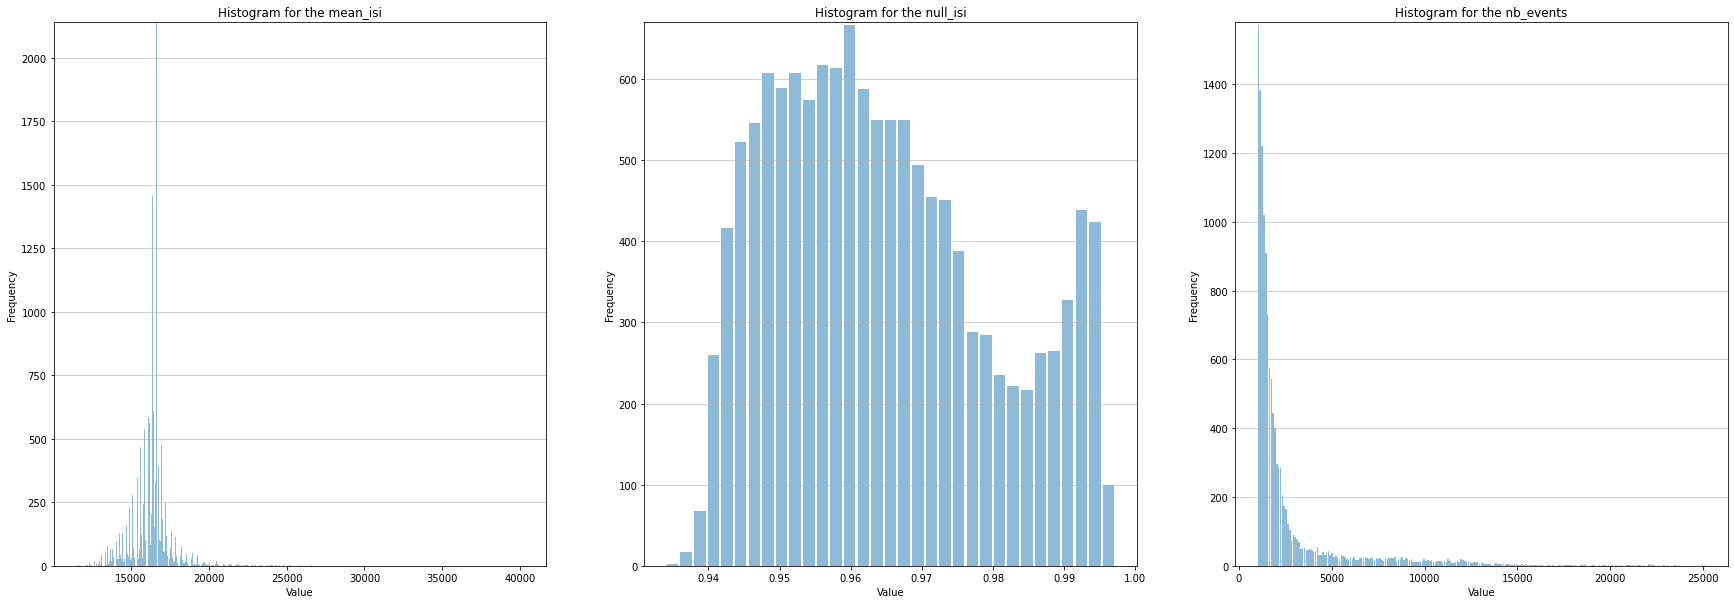

In [2]:
values = get_dataset_info(trainset, testset)

number of samples in the trainset: 8528
number of samples in the testset: 4663
----------------------------------------
number of samples in each class for the trainset: [4788. 3740.]
number of samples in each class for the testset: [3444. 1219.]
----------------------------------------


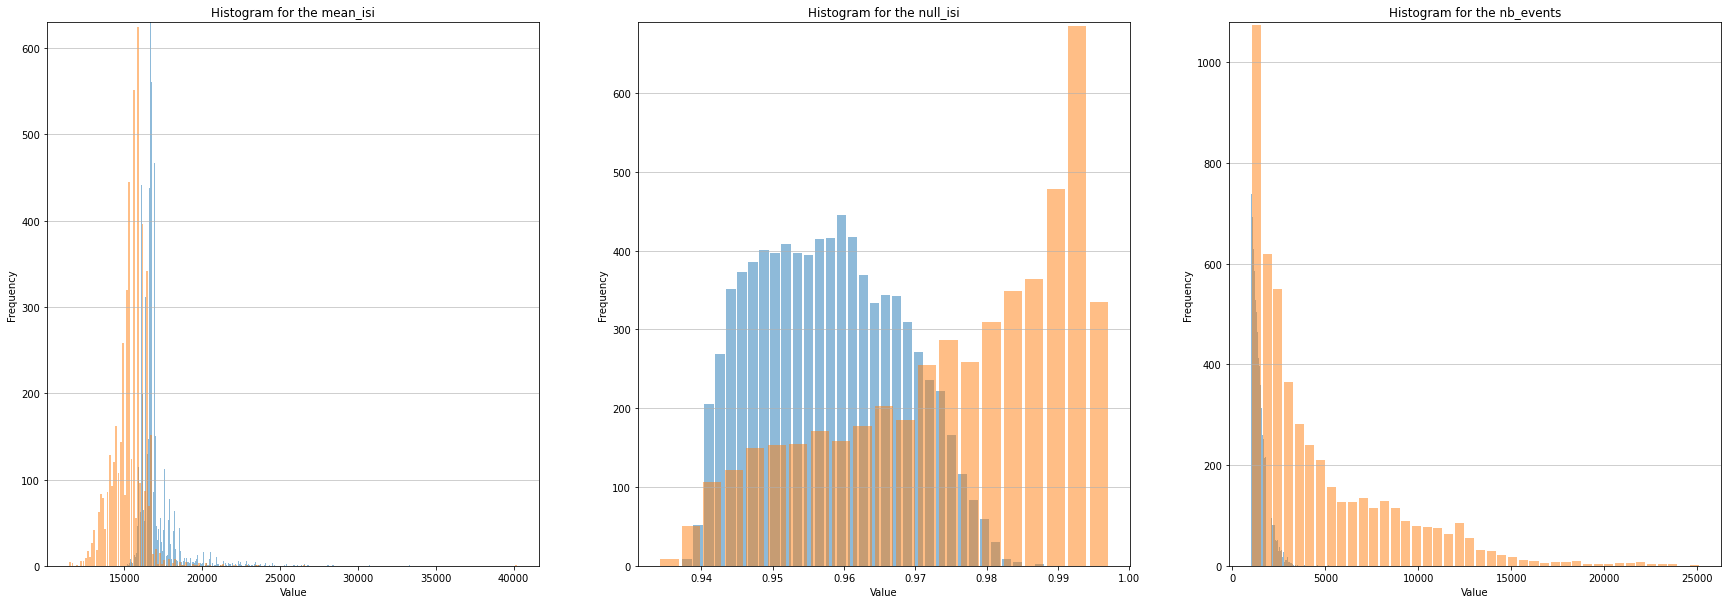

In [3]:
values = get_dataset_info(trainset, testset, distinguish_labels=True)

## Classification with MLR on raw events

In [34]:
kfold = 5
MLR_model, losses = fit_MLR(path, date, tau_cla, patch_size=patch_size, max_duration = max_duration, kfold=kfold)

../Records/models/2022-01-03_RAW_3_(32, 32)_30_LR.pkl
Number of training samples: 284
device -> cuda - num workers -> 0


  3%|████▍                                                                                                                                            | 1/33 [00:33<18:03, 33.86s/it]

loss for epoch number 0: 0.412694947460512


  6%|████████▊                                                                                                                                        | 2/33 [01:07<17:20, 33.57s/it]

loss for epoch number 1: 0.32478942454051596


  9%|█████████████▏                                                                                                                                   | 3/33 [01:40<16:46, 33.54s/it]

loss for epoch number 2: 0.2874810675243925


 12%|█████████████████▌                                                                                                                               | 4/33 [02:14<16:13, 33.56s/it]

loss for epoch number 3: 1.2162564495361907


 15%|█████████████████████▉                                                                                                                           | 5/33 [02:47<15:35, 33.42s/it]

loss for epoch number 4: 0.38123333937862763


 18%|██████████████████████████▎                                                                                                                      | 6/33 [03:21<15:03, 33.47s/it]

loss for epoch number 5: 0.5466246360236864


 21%|██████████████████████████████▊                                                                                                                  | 7/33 [03:54<14:32, 33.54s/it]

loss for epoch number 6: 0.8310531799878349


 24%|███████████████████████████████████▏                                                                                                             | 8/33 [04:28<14:00, 33.61s/it]

loss for epoch number 7: 0.6854763534305283


 27%|███████████████████████████████████████▌                                                                                                         | 9/33 [05:02<13:26, 33.61s/it]

loss for epoch number 8: 0.9368016222517997


 30%|███████████████████████████████████████████▋                                                                                                    | 10/33 [05:35<12:53, 33.63s/it]

loss for epoch number 9: 0.6833039276760674


 33%|████████████████████████████████████████████████                                                                                                | 11/33 [06:09<12:23, 33.79s/it]

loss for epoch number 10: 0.3282734962140496


 36%|████████████████████████████████████████████████████▎                                                                                           | 12/33 [06:43<11:50, 33.82s/it]

loss for epoch number 11: 0.8843369496113933


 39%|████████████████████████████████████████████████████████▋                                                                                       | 13/33 [07:17<11:14, 33.70s/it]

loss for epoch number 12: 0.548477077658089


 42%|█████████████████████████████████████████████████████████████                                                                                   | 14/33 [07:50<10:39, 33.65s/it]

loss for epoch number 13: 0.5035576546395211


 45%|█████████████████████████████████████████████████████████████████▍                                                                              | 15/33 [08:23<10:03, 33.51s/it]

loss for epoch number 14: 1.1829780950352535


 48%|█████████████████████████████████████████████████████████████████████▊                                                                          | 16/33 [08:57<09:28, 33.42s/it]

loss for epoch number 15: 0.22165499817509443


 52%|██████████████████████████████████████████████████████████████████████████▏                                                                     | 17/33 [09:30<08:55, 33.48s/it]

loss for epoch number 16: 0.6286877192296083


 55%|██████████████████████████████████████████████████████████████████████████████▌                                                                 | 18/33 [10:04<08:21, 33.42s/it]

loss for epoch number 17: 0.8359387210666895


 58%|██████████████████████████████████████████████████████████████████████████████████▉                                                             | 19/33 [10:37<07:49, 33.56s/it]

loss for epoch number 18: 0.6689497110770383


 61%|███████████████████████████████████████████████████████████████████████████████████████▎                                                        | 20/33 [11:11<07:18, 33.70s/it]

loss for epoch number 19: 0.6668179973315411


 64%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 21/33 [11:45<06:42, 33.51s/it]

loss for epoch number 20: 0.13954914571844163


 67%|████████████████████████████████████████████████████████████████████████████████████████████████                                                | 22/33 [12:18<06:09, 33.56s/it]

loss for epoch number 21: 1.110079245733187


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 23/33 [12:52<05:35, 33.59s/it]

loss for epoch number 22: 1.0160557618262562


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 24/33 [13:25<05:01, 33.51s/it]

loss for epoch number 23: 0.20940311191458827


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 25/33 [13:58<04:27, 33.40s/it]

loss for epoch number 24: 0.684189141998826


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 26/33 [14:32<03:54, 33.45s/it]

loss for epoch number 25: 0.27049326872576634


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 27/33 [15:06<03:21, 33.67s/it]

loss for epoch number 26: 0.5386846449956886


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 28/33 [15:41<02:49, 33.95s/it]

loss for epoch number 27: 0.7183530871416758


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 29/33 [16:14<02:15, 33.84s/it]

loss for epoch number 28: 0.3959651653302583


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 30/33 [16:48<01:40, 33.66s/it]

loss for epoch number 29: 0.1598191788582117


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 31/33 [17:21<01:07, 33.57s/it]

loss for epoch number 30: 0.9080629426996364


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 32/33 [17:54<00:33, 33.50s/it]

loss for epoch number 31: 0.43665450454672383


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [18:28<00:00, 33.59s/it]

loss for epoch number 32: 0.20956174236303562


In [35]:
likelihood, true_target, timestamps = predict_data(path, date, tau_cla, patch_size=patch_size, max_duration = max_duration, kfold=kfold)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 154/154 [00:19<00:00,  7.84it/s]


Mean accuracy: 78.60000000000001%


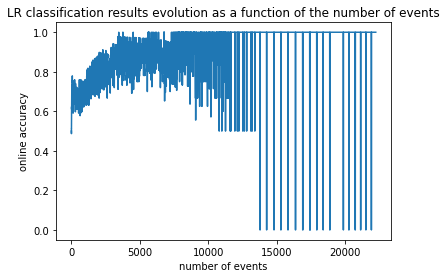

In [36]:
meanac, onlinac, lastac, truepos, falsepos = score_classif_events(likelihood, true_target)

### Higher threshold

Mean accuracy: 98.1%


/home/INT/grimaldi.a/Documents/projets/HOTS/newhots/HOTS/tools.py:354: RuntimeWarning: Mean of empty slice
  onlinac = np.nanmean(matscor, axis=0)


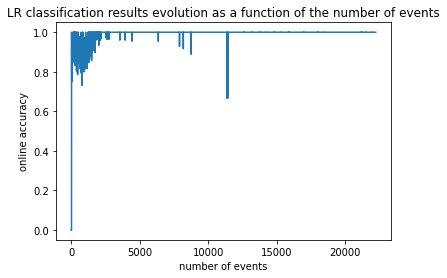

In [38]:
likelihood_threshold = .9
meanac, onlinac, lastac, truepos, falsepos = score_classif_events(likelihood, true_target, thres=likelihood_threshold)

  0%|                                                                                                                                                        | 0/154 [00:00<?, ?it/s]/home/INT/grimaldi.a/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/INT/grimaldi.a/.local/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 154/154 [00:03<00:00, 46.11it/s]
/home/INT/grimaldi.a/Documents/projets/HOTS/newhots/HOTS/tools.py:415: RuntimeWarning: Mean of empty slice
  truepos = len(np.where(matscor==1)[0])


Mean accuracy: 83.3%


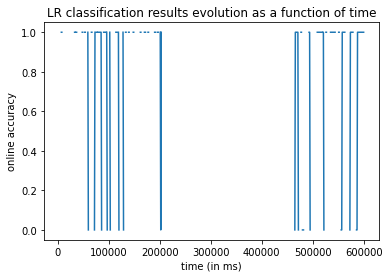

In [37]:
timestep = 1e6 # 1ms
meanac, onlinac, lastac, truepos, falsepos = score_classif_time(likelihood, true_target, timestamps, timestep= timestep)

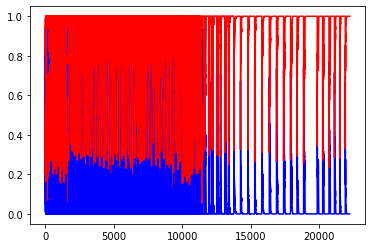

In [39]:
import matplotlib.pyplot as plt
for sample in range(len(likelihood)):
    plt.plot(likelihood[sample][:,0], 'b')
    plt.plot(likelihood[sample][:,1], 'r')

2048